Anna Wallin<br>
arw3768<br>
anna.wallin@utexas.edu<br>
Data Visualization Report<br>
December 7, 2020<br>


<p style="text-align: center;"> Data Analysis of Films Found on Popular Streaming Platforms </p>

### Introduction and Summary
The data set for this project was found on Kaggle (link can be accessed in the works cited). It is a part of the public domain and is of considerable size. There are 16,744 entries (movies). The data set was last updated on 5/22/2020 and was created via web scraping. The columns found in the data set include an ID; film title; year of release; age rating (such as 18+); IMDb score; Rotten Tomatoes score; whether it is available on Netflix, Hulu, Amazon Prime, or Disney Plus; the director, Genre(s), runtime, country(ies) the film is from, and finally, the language(s) of the film. The data types include categorical (binary), numerical, and nominal data.

Preliminary examination of the data shows some interesting findings. The oldest film in the data set is a short 13 minute French film from 1902, titled *A Trip to the Moon*, which can be found on Prime Video (Amazon). The bottom quartile of films is from 2000 and earlier, meaning that most films on these streaming platforms were made within the last two decades. This could be due to the relatively new nature of streaming TV (predisposed to have newer content); however exact reasoning would need to be explored further. Out of 16,744 films included in the data, only 147 are from 2020. English is the most common film language, followed by Spanish (Fig. 0). Additionally, aside from runtime and release year, the data includes information from two popular movie rating sites, IMDb and Rotten Tomatoes. IMDb employs a rating system on a 1-10 scale, while Rotten Tomatoes uses a percentage (a decimal from 0 to 1). However, Rotten Tomatoes has 11,586 missing values. When this is corrected for by only comparing values where there is a rating for both Rotton Tomatoes and IMDB, the scores are close with Rotten Tomatoes having an average of 0.654285 on a 0 to 1 scale and IMDb having an average of 6.375233 on a 1 to 10 scale (before correcting for this, the average on Rotten Tomatoes is 0.654285 and 5.902751 for IMDb). 

Text(0, 0.5, 'Count')

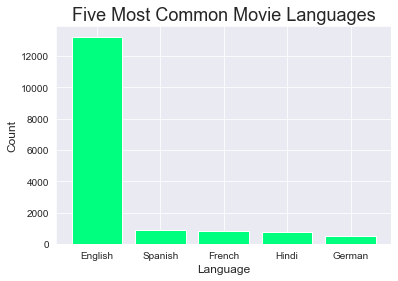

In [102]:
#top 5 most common movie languages overall
df3=df.assign(Lang=df['Language'].str.split(",")).explode("Lang") #split by lang

df3.sort_values(by=['Lang']).head(5)
Lang=df3['Lang'].value_counts() #view top 5 lang
Dict_Lang2={"English": 13233, "Spanish": 872, "French": 799, "Hindi": 731,"German": 483} #dict of top 5 lang
sns.set_palette(["springgreen"]) #color
plt.bar(Dict_Lang2.keys(), Dict_Lang2.values()) #make vis
plt.title("Five Most Common Movie Languages", size = 18) #add title
plt.xlabel("Language", size=12) #label
plt.ylabel("Count", size=12) #label


**Fig. 0** Shows most common languages across streaming services

The goal of this project was to examine overall prevalence of film genre as well as their breakdown on different streaming services. This data and related visualizations can help users to optimize their subscription choices. For example, if an individual is interested in watching comedies, they could opt for the platform which has the highest proportion of comedies. The secondary goal was to examine ratings data from two popular sites: IMDb and Rotten Tomatoes.

In order to work with the data, there are several libraries that were imported. They include pandas, numpy, matplotlib, and seaborn. These are commonly found in the data science world and are useful to manipulate data and then to visualize it. It is then necessary to read in the CSV file and create a dataframe to work with. Finally, examining null values is essential. In fig. 1, there is a breakdown of the null values within the dataset. Interestingly, Rotten Tomatoes appears to have many more nulls than IMDb. The value for Rotten Tomatoes (11,586 nulls) appeared quite large and was double checked via sorting, binary coding the empty values, and then counting them. In order to aptly compare IMDb and Rotten Tomatoes scoring sites, they were filtered to exclude any nulls. 

Additionally, the genre column features multiple entries for a single movie, which were separated by commas. This was "cleaned up" by splitting by comma. The explode method which was used in this project accounts for missing values. This split created a separate entry for each genre, which was linked according to an ID. Then, graphs were created that visualized the overall breakdown of films by genres (fig. 2-fig. 6). Countplot was used in each case and percentages, which denote genre/movie, were added to the top of each bar. Each movie can have multiple genre tags, so the total percentage can add up to above 100%. The bars are listed in descending order, so that the most common genre comes first. Bar coloring is also consistent throughout (E.G. Drama is always magenta). Overall, dramas were the most common on all platforms, except for Disney Plus, which featured the most family films. Necessary columns were renamed (Disney + to Disney, Prime Video to Amazon), so that the code would run, without issues due to spacing and symbols. Seaborn FacetGrid was not used because the Netflix, Hulu, Disney Plus, and Prime Video (Amazon) data were binary coded with the possibility of films being available on multiple platforms. This made it difficult to employ this technique. Therefore, graphs were done individually without FacetGrid being employed.

Next, scatterplots (fig. 7-fig. 11) were created to show the breakdown of movie ratings overall and according to platform. While, as mentioned earlier, Rotten Tomatoes, has a higher average rating than IMDb, there are roughly positive correlations throughout. So, if a movie is rated highly on IMDb, it is likely rated similarly on Rotten Tomatoes as well.

Overall, this project will help movie viewers to better understand their streaming options and rating systems. They can learn which platforms have the most films, the most fims in their favorite genres, and learn more about two popular rating sites. 

In [2]:
#preliminary background snooping to gain a greater appreciation and understanding of the data.
#import to work with your data
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

#load in your data
data_csv = pd.read_csv(r'C:\Users\Movie_Services.csv')
#convert data to pandas data frame
df = pd.DataFrame(data_csv)
#gain a greater understanding of your data through some preliminary sleuthing
#list(df.columns)  #see column titles to see what data includes
#df.describe()  # see summary statistics
#df_2020=df[(df.Year == 2020)]  #filter data by year 2020
#df_2020.count(0)  #count column values - 147 films made in 2020

#make a data frame that has imdb and rotten tomatoes....account for nulls to compare avgs
df_handle_nulls_Ratings = df.groupby(['ID','Year','Title','Rotten Tomatoes'], as_index=False)['IMDb'].aggregate(np.mean) 
df_handle_nulls_Ratings.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
#df_handle_nulls_Ratings.describe() 

#look for null values
#df.isnull().sum().sum() # count of missing values overall across columns and rows
df.isnull().sum() #breakdown of missing values by column

Unnamed: 0             0
ID                     0
Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

**Fig. 1** shows a breakdown of null values by column<br>

In [23]:
#split Genres column by , 
df2=df.assign(MovieType=df['Genres'].str.split(",")).explode("MovieType")

#group data by their respective ID, year, movie type, and rating on IMDb
ratings2 = df2.groupby(['ID', 'Year', "MovieType"], as_index=False)['IMDb'].aggregate(np.mean) 
#ratings2.head() #view the grouped data

#check that MovieType column was created successfully and is present in the new dataframe
#df2.loc[0,'MovieType']
#df2.loc[0,:]

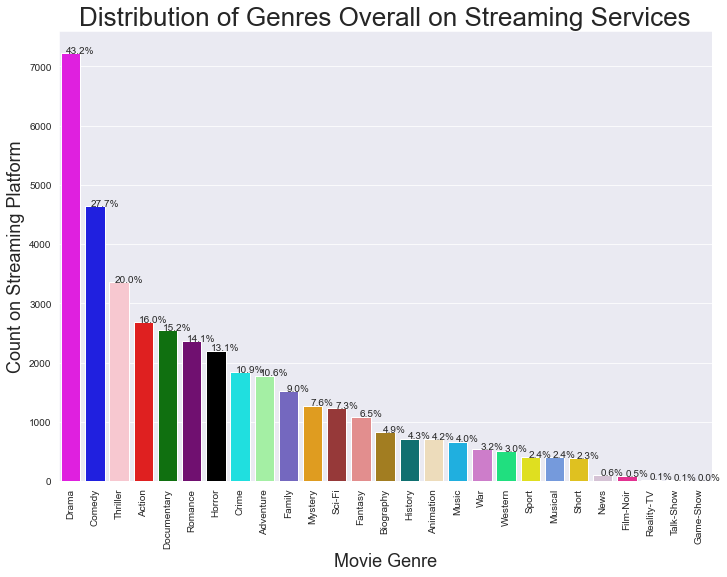

In [24]:
#overall genres popularity on all services TRY TO STANDARDIZE COLORS
dimensions_for_graph = (6, 5) #to avoid overlapping percents 
a4_dims = (11.7, 8.27) #set sizing, which will be used on the genre countplots
fig, ax = plt.subplots(figsize=a4_dims) #need to use matplotlib to correct for overlap issue with the percents 
desc_order = df2["MovieType"].value_counts().sort_values(ascending=False).index #order bars
sns.set_palette(["magenta","blue","pink","red","green","purple","black","Cyan","palegreen", "slateblue","orange","brown","lightcoral","darkgoldenrod","teal","wheat","deepskyblue","orchid","springgreen","yellow","cornflowerblue","gold","thistle","deeppink","tan","bisque","lime"])
ax2 = sns.countplot(df2.MovieType, order=desc_order)
plt.title("Distribution of Genres Overall on Streaming Services", size=26)
plt.xticks(rotation=90)
total2 = (len(df["Title"])) # THIS IS count OF all MOVIES IN DENOMINATOR
plt.xlabel("Movie Genre", size=18)
plt.ylabel("Count on Streaming Platform", size=18)
sns.set_style("darkgrid")

for p in ax2.patches:
    percentage2 = '{:.1f}%'.format(100 * p.get_height()/total2)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage2, (x, y),ha='center');

**fig. 2** shows a breakdown of films by movie genre overall <br>

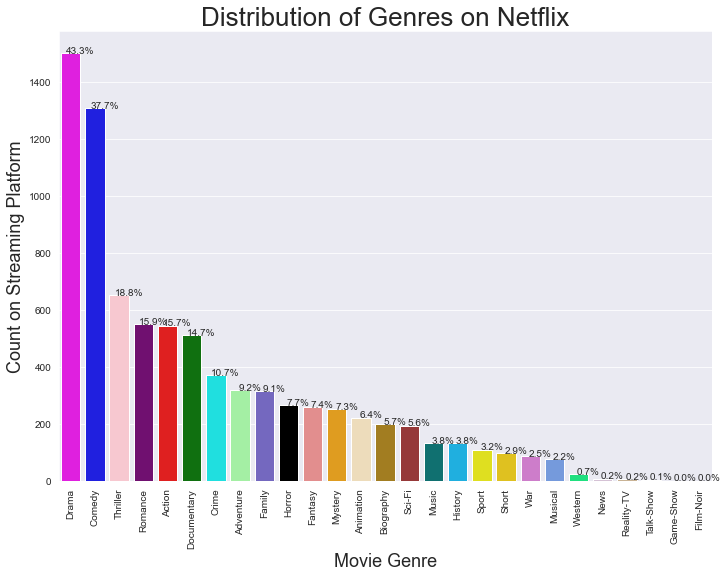

In [25]:
#netflix attempt percents 
Netflix_Count = df2.groupby(['ID', "MovieType","Title"], as_index=False)['Netflix'].aggregate(np.mean) #group by netflix
df_Netflix=Netflix_Count[(Netflix_Count.Netflix == 1)] #filter for only 1 aka on netflix service
descending_order2 = df_Netflix["MovieType"].value_counts().sort_values(ascending=False).index
dimensions_for_graph = (6, 5) #to avoid overlapping percents 
fig, ax = plt.subplots(figsize=a4_dims) #need to use matplotlib to correct for overlap issue with the percents 
sns.set_palette(["magenta","blue","pink","purple","red","green","cyan","palegreen","slateblue", "black","lightcoral","orange","wheat","darkgoldenrod","brown","teal","deepskyblue","yellow","gold","orchid","cornflowerblue","springgreen","thistle","tan","bisque","lime","deeppink"])

ax=sns.countplot(x='MovieType', data=df_Netflix, order=descending_order2) #make visualization
plt.xticks(rotation=90) #rotate axis titles

#add labeling
plt.title("Distribution of Genres on Netflix", size=26) #add title
plt.xlabel("Movie Genre", size=18)
plt.ylabel("Count on Streaming Platform", size=18)

#add percents
#total = (len(df_Netflix["MovieType"])) #of the proportion of tags, 18% are drama
#total=(len(df["Title"])) #of the genre tags included in each movie listing, 43% include the keyword drama
#create df that has Hulu but without split column for denominator
df_Netflix_NoSplit= df.groupby(['ID', "Genres", "Title"], as_index=False)['Netflix'].aggregate(np.mean) #this groups Netflix in OG dataframe (no split)
df_Netflix_NoSplit_OnlyNetflix=df_Netflix_NoSplit[(df_Netflix_NoSplit.Netflix == 1)] #this takes values where Netflix is 1 (AKA film is on Netflix)
#add percents
total=(len(df_Netflix_NoSplit_OnlyNetflix["Title"]))
for p in ax.patches:
    percentageNetflix = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentageNetflix, (x, y),ha='center');

**fig. 3** shows a breakdown of films by movie genre on Netflix<br>

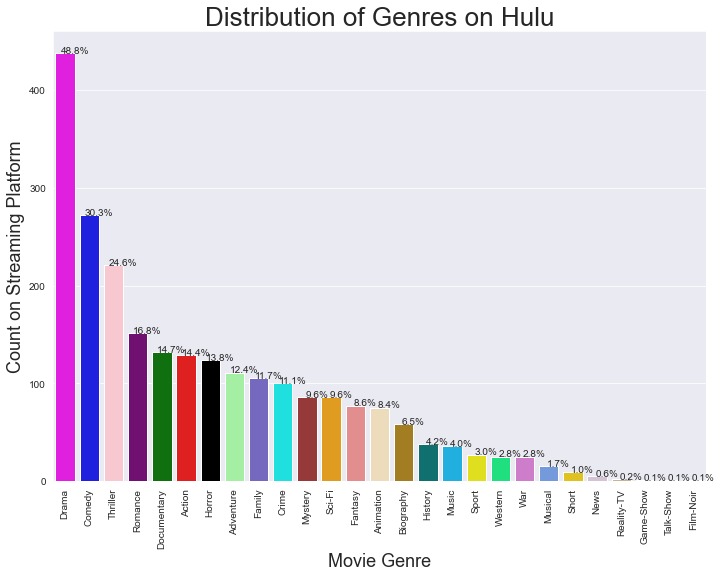

In [26]:
#Hulu attempt percents 
Hulu_Count = df2.groupby(['ID', "MovieType", "Title"], as_index=False)['Hulu'].aggregate(np.mean) #group by Hulu

df_Hulu=Hulu_Count[(Hulu_Count.Hulu == 1)] #filter for only 1 aka on Hulu service
descending_order3 = df_Hulu["MovieType"].value_counts().sort_values(ascending=False).index
dimensions_for_graph = (6, 5) #to avoid overlapping percents 
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims) #need to use matplotlib to correct for overlap issue with the percents 
sns.set_palette(["magenta","blue","pink","purple","green","red","black","palegreen","slateblue", "cyan","brown","orange","lightcoral","wheat","darkgoldenrod","teal","deepskyblue","yellow","springgreen","orchid","cornflowerblue","gold","thistle","tan","deeppink","lime","bisque"])
sns.set_style("darkgrid")
ax3=sns.countplot(x='MovieType', data=df_Hulu, order=descending_order3) #make visualization
plt.xticks(rotation=90) #rotate axis titles

#add labeling
plt.title("Distribution of Genres on Hulu", size=26) #add title
plt.xlabel("Movie Genre", size=18)
plt.ylabel("Count on Streaming Platform", size=18)

#create df that has Hulu but without split column for denominator
df_Hulu_NoSplit= df.groupby(['ID', "Genres", "Title"], as_index=False)['Hulu'].aggregate(np.mean) #this groups hulu in OG dataframe (no split)
df_Hulu_NoSplit_OnlyHulu=df_Hulu_NoSplit[(df_Hulu_NoSplit.Hulu == 1)] #this takes values where Hulu is 1 (AKA film is on Hulu)
#add percents
total3=(len(df_Hulu_NoSplit_OnlyHulu["Title"]))
for p in ax3.patches:
    percentageHulu = '{:.1f}%'.format(100 * p.get_height()/total3)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax3.annotate(percentageHulu, (x, y),ha='center');

**fig. 4** shows a breakdown of films by movie genre on Hulu<br>

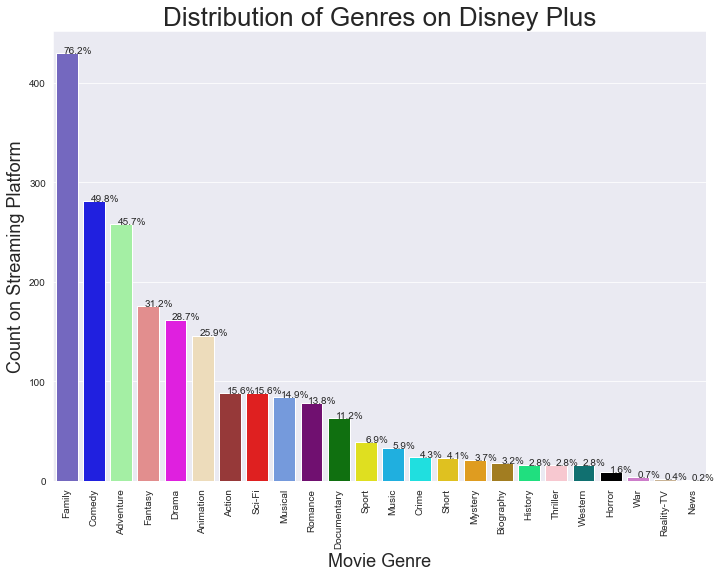

In [27]:
#disney attempt 
Disney_Count = df2.groupby(['ID', "MovieType"], as_index=False)['Disney+'].aggregate(np.mean) 
Disney_Count #group to simplify
Disney_Count.rename(columns = {'Disney+':'Disney'}, inplace = True) #rename Disney+ column to Disney to get next line to run
df_Disney=Disney_Count[(Disney_Count.Disney == 1)] #select only movies on Disney

dimensions_for_graph = (6, 5) #to avoid overlapping percents 
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

descending_order_Disney = df_Disney["MovieType"].value_counts().sort_values(ascending=False).index
sns.set_palette(["slateblue","blue","palegreen","lightcoral","magenta","wheat","brown","red","cornflowerblue", "purple","green","yellow","deepskyblue","cyan","gold","orange","darkgoldenrod","springgreen","pink","teal","black","orchid","tan","black","plum","tan","thistle"])
sns.set_style("darkgrid")
ax4=sns.countplot(x='MovieType', data=df_Disney, order=descending_order_Disney)
plt.xticks(rotation=90)
#add labeling
plt.title("Distribution of Genres on Disney Plus", size=26) #add title
plt.xlabel("Movie Genre", size=18)
plt.ylabel("Count on Streaming Platform", size=18)

#add percents 
#create df that has Hulu but without split column for denominator
df_Disney_NoSplit= df.groupby(['ID', "Genres", "Title"], as_index=False)['Disney+'].aggregate(np.mean) #this groups Disney in OG dataframe (no split)
df_Disney_NoSplit.rename(columns = {'Disney+':'Disney'}, inplace = True)
df_Disney_NoSplit_OnlyDisney=df_Disney_NoSplit[(df_Disney_NoSplit.Disney == 1)] #this takes values where Disney is 1 (AKA film is on Disney)
#add percents
total4=(len(df_Disney_NoSplit_OnlyDisney["Title"]))
for p in ax4.patches:
    percentageDisney = '{:.1f}%'.format(100 * p.get_height()/total4)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax4.annotate(percentageDisney, (x, y),ha='center');

**fig. 5** shows a breakdown of films by movie genre on Disney Plus<br>

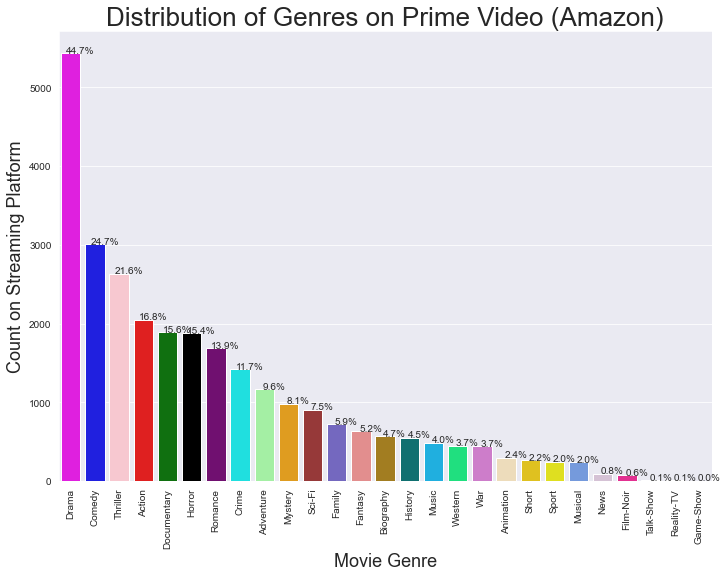

In [28]:
#amazon attempt 
Amazon_Count = df2.groupby(['ID', "MovieType"], as_index=False)['Prime Video'].aggregate(np.mean) 
Amazon_Count #group to simplify
Amazon_Count.rename(columns = {'Prime Video':'Amazon'}, inplace = True) #rename Prime Video column to Amazon to get next line to run
df_Amazon=Amazon_Count[(Amazon_Count.Amazon == 1)] #select only movies on Disney
dimensions_for_graph = (6, 5) #to avoid overlapping percents 
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.set_palette(["magenta","blue","pink","red","green","black","purple","Cyan","palegreen", "orange","brown","slateblue","lightcoral","darkgoldenrod","teal","deepskyblue","springgreen","orchid","wheat","gold","yellow","cornflowerblue","thistle","deeppink","bisque","tan","lime"])
sns.set_style("darkgrid")
descending_order_Amazon = df_Amazon["MovieType"].value_counts().sort_values(ascending=False).index
ax_Amazon=sns.countplot(x='MovieType', data=df_Amazon, order=descending_order_Amazon)
plt.xticks(rotation=90)
#add labeling
plt.title("Distribution of Genres on Prime Video (Amazon)", size=26) #add title
plt.xlabel("Movie Genre", size=18)
plt.ylabel("Count on Streaming Platform", size=18)

#add percents
#totalAmazon = (len(df_Amazon["MovieType"]))
#create df that has amazon but without split column for denominator
df_Amazon_NoSplit= df.groupby(['ID', "Genres", "Title"], as_index=False)['Prime Video'].aggregate(np.mean) #this groups hulu in OG dataframe (no split)
df_Amazon_NoSplit.rename(columns = {'Prime Video':'Amazon'}, inplace = True)
df_Amazon_NoSplit_OnlyAmazon=df_Amazon_NoSplit[(df_Amazon_NoSplit.Amazon == 1)] #this takes values where amazon is 1 (AKA film is on amazon)
#add percents
totalAmazon=(len(df_Amazon_NoSplit_OnlyAmazon["Title"]))
for p in ax_Amazon.patches:
    percentageAmazon = '{:.1f}%'.format(100 * p.get_height()/totalAmazon)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax_Amazon.annotate(percentageAmazon, (x, y),ha='center');

**fig. 6** shows a breakdown of films by movie genre on Prime Video (Amazon)<br>

### Examining Genre Popularity According to Streaming Platform
Using the newly created dataframe (df2), which was split according to genre, countplots were created to compare genre popularity. Dramas were the most common on every platform except Disney Plus, where the Family genre was most prevalent. The second most frequent genre across platforms was the Comedy genre (fig. 2 - fig. 6). However, if a user is interested in optimizing their subscription choice according to their genre preference, they can select the platform that has the highest proportion of the type of show that interests them. For example, if an individual is fond of action, they could opt to purchase a Prime Video (Amazon) subscription because this platform has the highest proportion of this film type at 16.8% (fig. 6). Additionally, if a user simply wants the most choice, they would be best off purchasing a subscription to Prime Video (Amazon), which has 12,353 films. Their next best option would be Netflix at 3,560 films. Essentially, these graphs allow users to visualize and then optimize their streaming platform choice according to their genre preferences. Colors have been standardized across graphs (E.G. magenta always denotes Drama). Percentages at the top of the bars will add up to over 100% because each film has multiple genre listings. For example, Inception is tagged as: Action, Adventure, Sci-Fi, and Thriller.

Text(0.5, 1.0, 'IMDb vs Rotten Tomato Ratings Overall')

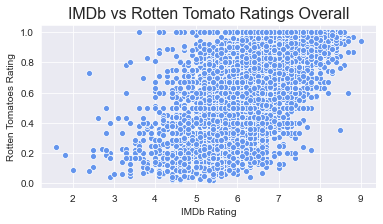

In [29]:
df_handle_nulls_Ratings.rename(columns = {'Rotten Tomatoes':'Rotten_Tomatoes'}, inplace = True) #rename Disney+ column to Disney to get next line to run
dimensions_for_graph = (8, 6) #to avoid overlapping percents 
a3_dims=(6, 3)
fig, ax = plt.subplots(figsize=a3_dims)
sns.scatterplot(data=df_handle_nulls_Ratings, x="IMDb", y="Rotten_Tomatoes", color="cornflowerblue")
plt.ylabel("Rotten Tomatoes Rating", size=10)
plt.xlabel("IMDb Rating", size=10)
plt.title("IMDb vs Rotten Tomato Ratings Overall",size=16)

**Fig. 7** shows a scatter plot of IMDb and Rotten Tomato Ratings Overall

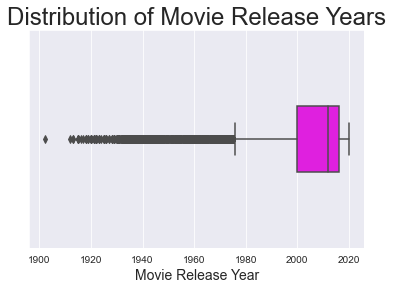

In [30]:
sns.boxplot( x=df["Year"], width=0.3 )
plt.title("Distribution of Movie Release Years", size=24)
plt.xlabel("Movie Release Year",size=14)
plt.show()

**Fig. 8**  This plot shows the distribution of film release years

Text(0.5, 1.0, 'Rotten Tomato Ratings by Year for Films on Netflix')

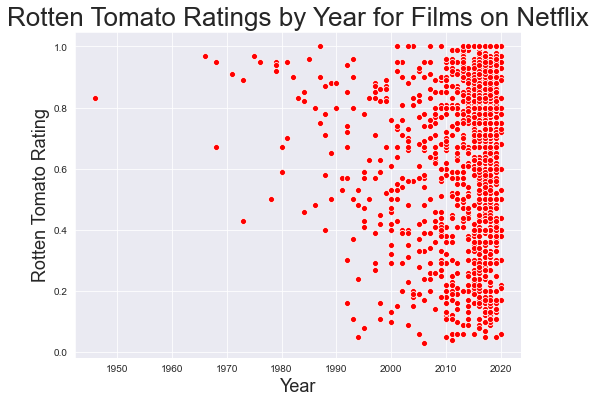

In [40]:
#scatter plot of IMDb and Rotten Tomato Ratings on Netflix
df_Netflix_NoSplit= df.groupby(['ID', "Genres", "Title", "Year", "IMDb","Rotten Tomatoes"], as_index=False)['Netflix'].aggregate(np.mean) #this groups Netflix in OG dataframe (no split)
df_Netflix_NullsHandled=df_Netflix_NoSplit[(df_Netflix_NoSplit.Netflix == 1)] #this takes values where Netflix is 1 (AKA film is on Netflix)
df_Netflix_NullsHandled.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df_Netflix_NullsHandled.rename(columns = {'Rotten Tomatoes':'Rotten_Tomatoes'}, inplace = True) #rename 

dimensions_for_graph = (8, 6) #to avoid overlapping percents 
a3_dims=(8, 6)
fig, ax = plt.subplots(figsize=a3_dims)
sns.scatterplot(data=df_Netflix_NullsHandled, x="Year", y="Rotten_Tomatoes", color="red")
plt.ylabel("Rotten Tomato Rating", size=18)
plt.xlabel("Year", size=18)
plt.title("Rotten Tomato Ratings by Year for Films on Netflix",size=26)

**Fig. 9** This plot shows the distribution of Rotten Tomato ratings according to year for films on Netflix 

Text(0.5, 1.0, 'IMDb Ratings by Year for Films on Netflix')

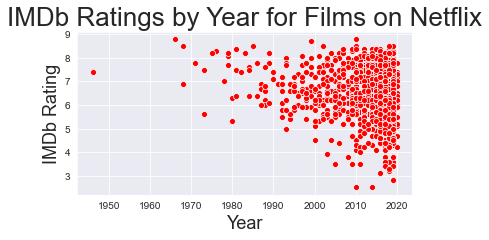

In [32]:
#scatter plot of IMDb and Rotten Tomato Ratings on Netflix
df_Netflix_NoSplit= df.groupby(['ID', "Genres", "Title", "Year", "IMDb","Rotten Tomatoes"], as_index=False)['Netflix'].aggregate(np.mean) #this groups Netflix in OG dataframe (no split)
df_Netflix_NullsHandled=df_Netflix_NoSplit[(df_Netflix_NoSplit.Netflix == 1)] #this takes values where Netflix is 1 (AKA film is on Netflix)
df_Netflix_NullsHandled.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df_Netflix_NullsHandled.rename(columns = {'Rotten Tomatoes':'Rotten_Tomatoes'}, inplace = True) #rename 

dimensions_for_graph = (8, 6) #to avoid overlapping percents 
a3_dims=(6, 3)
fig, ax = plt.subplots(figsize=a3_dims)
sns.scatterplot(data=df_Netflix_NullsHandled, x="Year", y="IMDb", color="red")
plt.ylabel("IMDb Rating", size=18)
plt.xlabel("Year", size=18)
plt.title("IMDb Ratings by Year for Films on Netflix",size=26)

**Fig. 10** This plot shows the distribution of IMDb ratings according to year for films on Netflix 

### Examining IMDb and Rotten Tomato Ratings According to Streaming Site
We can see that most films in this data set were produced in the year 2000 and later (fig. 8). For all streaming platforms (Netflix, Hulu, Disney Plus, and Amazon), there is a roughly positive correlation (fig. 7). In other words, if a movie is rated low on IMDb, it is slightly linked to also have a low rating on Rotten Tomatoes as well. This holds true across streaming platforms. Rotten Tomatoes data had considerable quantities of null values. These nulls were removed, so that only values that were non-null were considered. A limitation of these visualizations is that they do not take into account quantitity of ratings. For example, a film could have only one rating or a very small quantity of ratings on one site and more on the other. Therefore, a film could appear, for example, to be very good with a high rating but in actuality have very few reviews. Please see the appendix for a breakdown of ratings by streaming platform. We can also see that there are more ratings that have been recorded from 2010 and onwards (fig. 9 and fig. 10) (these two plots are for Netflix but could easily be switched out for other streaming services. Due to page constraints on this project, though, Netflix has been visualized). Essentially, while IMDb and Rotten Tomatoes are roughly positively correlated, there are more ratings for more recent films. So, there could be a bias in the data set in which older movies do not have very many ratings or are not represented. 

### Conclusion
In summary, if users enjoy dramas, they have a plethora of choices. Netflix and Amazon also have the most films overall, so they would be ideal choices for drama lovers. If a user is looking for more family friendly content, they could opt for Disney Plus. Most films in the data were produced during or after the year 2000. Overall, IMDb has a slightly lower average rating, but ratings are roughly positively correlated for all steaming platforms. If a movie goer is more discerning, they could read film reviews on IMDb before picking which movie to watch. If a user is looking for a film that has been rated on IMDb or Rotten Tomatoes, they are more likely to find a more recent film.

Data was filtered, multiple dataframes were created, and organization was maintained throughout with coloring and labeling being consistent. This report can help users the next time they would like to watch a movie. 

### Works Cited
Link to data set: https://www.kaggle.com/ruchi798/movies-on-netflix-prime-video-hulu-and-disney <br>
Link about how to view column names: https://www.geeksforgeeks.org/how-to-get-column-names-in-pandas-dataframe/ <br> 
Link about how to add percents to Seaborn countplots: #https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn <br>
Link about countplots: #https://www.kaggle.com/slamnz/seaborn-tutorial-count-plots <br>
Link about how to filter data in Python: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.filter.html <br>
Another link about how to filter data in Python: https://www.listendata.com/2019/07/how-to-filter-pandas-dataframe.html <br>
Link about renaming columns in Pandas: https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/ <br>
Link about splitting (separating cell entry by item, such as comma) which accounts for NaNs: https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows <br>
Another link about splitting column into multiple rows: https://medium.com/@sureshssarda/pandas-splitting-exploding-a-column-into-multiple-rows-b1b1d59ea12e <br>
Link to oldest film in data set: https://www.amazon.com/Trip-Moon-Victor-André/dp/B07DPF8HJV <br>
Link about deleting nulls: https://www.geeksforgeeks.org/drop-rows-from-pandas-dataframe-with-missing-values-or-nan-in-columns/ <br>
Link to changing colors of bars manually: https://stackoverflow.com/questions/31074758/how-to-set-a-different-color-to-the-largest-bar-in-a-seaborn-barplot <br>
Link to changing colors (ok if some values are the same, can differentiate colors, unlike method above): https://towardsdatascience.com/6-simple-tips-for-prettier-and-customised-plots-in-seaborn-python-22f02ecc2393 <br>
Changing grid setting: https://seaborn.pydata.org/tutorial/aesthetics.html <br>
Matplotlib colors: https://matplotlib.org/3.1.0/gallery/color/named_colors.html <br>

### Appendix

Text(0.5, 1.0, 'IMDb vs Rotten Tomato Ratings for Films on Netflix')

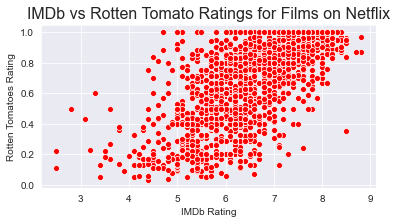

In [33]:
#scatter plot of IMDb and Rotten Tomato Ratings on Netflix
df_Netflix_NoSplit= df.groupby(['ID', "Genres", "Title", "IMDb","Rotten Tomatoes"], as_index=False)['Netflix'].aggregate(np.mean) #this groups Netflix in OG dataframe (no split)
df_Netflix_NullsHandled=df_Netflix_NoSplit[(df_Netflix_NoSplit.Netflix == 1)] #this takes values where Netflix is 1 (AKA film is on Netflix)
df_Netflix_NullsHandled.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df_Netflix_NullsHandled.rename(columns = {'Rotten Tomatoes':'Rotten_Tomatoes'}, inplace = True) #rename 

dimensions_for_graph = (8, 6) #to avoid overlapping percents 
a3_dims=(6, 3)
fig, ax = plt.subplots(figsize=a3_dims)
sns.scatterplot(data=df_Netflix_NullsHandled, x="IMDb", y="Rotten_Tomatoes", color="red")
plt.ylabel("Rotten Tomatoes Rating", size=10)
plt.xlabel("IMDb Rating", size=10)
plt.title("IMDb vs Rotten Tomato Ratings for Films on Netflix",size=16)

**Fig.** shows a scatter plot of IMDb and Rotten Tomato Ratings for Films on Netflix

Text(0.5, 1.0, 'IMDb vs Rotten Tomato Ratings for Films on Hulu')

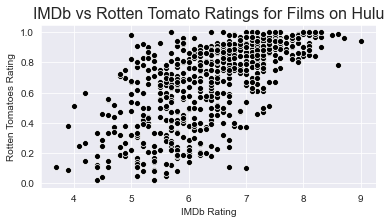

In [34]:
#scatter plot of IMDb and Rotten Tomato Ratings on Hulu
df_Hulu_NoSplit= df.groupby(['ID', "Genres", "Title", "IMDb","Rotten Tomatoes"], as_index=False)['Hulu'].aggregate(np.mean) #this groups Netflix in OG dataframe (no split)
df_Hulu_NullsHandled=df_Hulu_NoSplit[(df_Hulu_NoSplit.Hulu == 1)] #this takes values where Netflix is 1 (AKA film is on Netflix)
df_Hulu_NullsHandled.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df_Hulu_NullsHandled.rename(columns = {'Rotten Tomatoes':'Rotten_Tomatoes'}, inplace = True) #rename 

dimensions_for_graph = (8, 6) #to avoid overlapping percents 
a3_dims=(6, 3)
fig, ax = plt.subplots(figsize=a3_dims)
sns.scatterplot(data=df_Hulu_NullsHandled, x="IMDb", y="Rotten_Tomatoes", color="black")
plt.ylabel("Rotten Tomatoes Rating", size=10)
plt.xlabel("IMDb Rating", size=10)
plt.title("IMDb vs Rotten Tomato Ratings for Films on Hulu",size=16)

**Fig.** shows a scatter plot of IMDb and Rotten Tomato Ratings for Films on Hulu

Text(0.5, 1.0, 'IMDb vs Rotten Tomato Ratings for Films on Disney Plus')

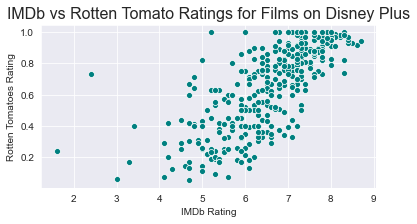

In [35]:
#scatter plot of IMDb and Rotten Tomato Ratings on Disney
df_Disney_NoSplit= df.groupby(['ID', "Genres", "Title", "IMDb","Rotten Tomatoes"], as_index=False)['Disney+'].aggregate(np.mean) #this groups Netflix in OG dataframe (no split)
df_Disney_NoSplit.rename(columns = {'Disney+':'Disney'}, inplace = True) #rename 
df_Disney_NullsHandled=df_Disney_NoSplit[(df_Disney_NoSplit.Disney == 1)] #this takes values where Netflix is 1 (AKA film is on Netflix)
df_Disney_NullsHandled.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df_Disney_NullsHandled.rename(columns = {'Rotten Tomatoes':'Rotten_Tomatoes'}, inplace = True) #rename 

dimensions_for_graph = (8, 6) #to avoid overlapping percents 
a3_dims=(6, 3)
fig, ax = plt.subplots(figsize=a3_dims)
sns.scatterplot(data=df_Disney_NullsHandled, x="IMDb", y="Rotten_Tomatoes", color="teal")
plt.ylabel("Rotten Tomatoes Rating", size=10)
plt.xlabel("IMDb Rating", size=10)
plt.title("IMDb vs Rotten Tomato Ratings for Films on Disney Plus",size=16)

**Fig.** shows a scatter plot of IMDb and Rotten Tomato Ratings for Films on Disney Plus

Text(0.5, 1.0, 'IMDb vs Rotten Tomato Ratings for Films on Prime Video (Amazon)')

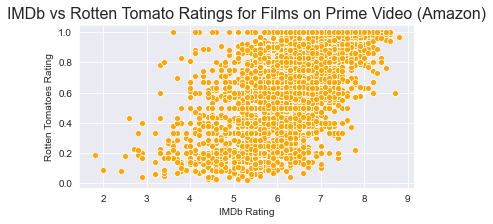

In [36]:
#scatter plot of IMDb and Rotten Tomato Ratings on amazon
df_amazon_NoSplit= df.groupby(['ID', "Genres", "Title", "IMDb","Rotten Tomatoes"], as_index=False)['Prime Video'].aggregate(np.mean) #this groups amazon in OG dataframe (no split)
df_amazon_NoSplit.rename(columns = {'Prime Video':'Amazon'}, inplace = True) #rename 
df_amazon_NullsHandled=df_amazon_NoSplit[(df_amazon_NoSplit.Amazon == 1)] #this takes values where Netflix is 1 (AKA film is on Netflix)
df_amazon_NullsHandled.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df_amazon_NullsHandled.rename(columns = {'Rotten Tomatoes':'Rotten_Tomatoes'}, inplace = True) #rename 

dimensions_for_graph = (8, 6) #to avoid overlapping percents 
a3_dims=(6, 3)
fig, ax = plt.subplots(figsize=a3_dims)
sns.scatterplot(data=df_amazon_NullsHandled, x="IMDb", y="Rotten_Tomatoes", color="orange")
plt.ylabel("Rotten Tomatoes Rating", size=10)
plt.xlabel("IMDb Rating", size=10)
plt.title("IMDb vs Rotten Tomato Ratings for Films on Prime Video (Amazon)",size=16)

**Fig.** shows a scatter plot of IMDb and Rotten Tomato Ratings for Films on Prime Video (Amazon)

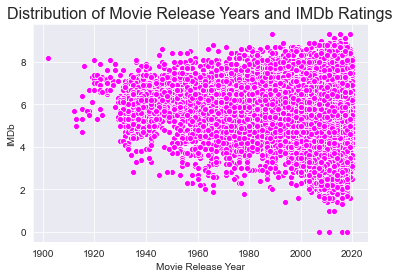

In [37]:
sns.scatterplot( x=df["Year"], y=df["IMDb"])
plt.title("Distribution of Movie Release Years and IMDb Ratings", size=16)
plt.xlabel("Movie Release Year",size=10)
plt.show()

**Fig.** shows a scatter plot of IMDb ratings according to movie release year